In [153]:
# Install the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [154]:
# load the data using the pandas read function
all_countrys=pd.read_csv('/kaggle/input/all-countries-details/All Countries.csv')
all_countrys.head()

,country,country_long,currency,capital_city,region,continent,demonym,latitude,longitude,agricultural_land,...,population,women_parliament_seats_pct,rural_population,urban_population,press,democracy_score,democracy_type,median_age,political_leader,title
0,Afghanistan,Islamic State of Afghanistan,Afghan afghani,Kabul,Southern Asia,Asia,Afghan,33.0,65.0,383560.0,...,41128771,27.01610,30181937,10946834,2.14,2.97,Authoritarian,12.9,Ashraf Ghani,President
1,Albania,Republic of Albania,Albanian lek,Tirana,Southern Europe,Europe,Albanian,41.0,20.0,11655.5,...,2775634,35.71430,1004807,1770827,2.62,5.98,Hybrid regime,33.7,Edi Rama,Prime Minister
2,Algeria,People's Democratic Republic of Algeria,Algerian dinar,Algiers,Northern Africa,Africa,Algerian,28.0,3.0,413588.0,...,44903225,8.10811,11328186,33575039,1.71,3.50,Authoritarian,24.0,Abdelmadjid Tebboune,President
3,Andorra,Principality of Andorra,Euro,Andorra la Vella,Southern Europe,Europe,Andorran,42.5,1.5,187.2,...,79824,46.42860,9730,70094,3.17,0.00,Unknown,38.9,Xavier Espot Zamora,Head of Government
4,Angola,People's Republic of Angola,Angolan kwanza,Luanda,Middle Africa,Africa,Angolan,-12.5,18.5,569525.0,...,35588987,33.63640,11359649,24229338,2.24,3.62,Authoritarian,12.4,João Lourenço,President


In [155]:
all_countrys.shape

(194, 64)

In [156]:
all_countrys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 64 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  194 non-null    object 
 1   country_long                             194 non-null    object 
 2   currency                                 194 non-null    object 
 3   capital_city                             194 non-null    object 
 4   region                                   194 non-null    object 
 5   continent                                194 non-null    object 
 6   demonym                                  194 non-null    object 
 7   latitude                                 194 non-null    float64
 8   longitude                                194 non-null    float64
 9   agricultural_land                        193 non-null    float64
 10  forest_area                              194 non-n

In [157]:
all_countrys.describe().style.background_gradient(cmap='brg')

,latitude,longitude,agricultural_land,forest_area,land_area,rural_land,urban_land,central_government_debt_pct_gdp,expense_pct_gdp,gdp,inflation,self_employed_pct,tax_revenue_pct_gdp,unemployment_pct,vulnerable_employment_pct,electricity_access_pct,alternative_nuclear_energy_pct,electricty_production_coal_pct,electricty_production_hydroelectric_pct,electricty_production_gas_pct,electricty_production_nuclear_pct,electricty_production_oil_pct,electricty_production_renewable_pct,energy_imports_pct,fossil_energy_consumption_pct,renewable_energy_consumption_pct,co2_emissions,methane_emissions,nitrous_oxide_emissions,greenhouse_other_emissions,urban_population_under_5m,health_expenditure_pct_gdp,health_expenditure_capita,hospital_beds,hiv_incidence,suicide_rate,armed_forces,internally_displaced_persons,military_expenditure_pct_gdp,birth_rate,death_rate,fertility_rate,internet_pct,life_expectancy,net_migration,population_female,population_male,population,women_parliament_seats_pct,rural_population,urban_population,press,democracy_score,median_age
count,194.000000,194.000000,193.000000,194.000000,194.000000,194.000000,194.000000,120.000000,156.000000,193.000000,184.000000,179.000000,159.000000,179.000000,179.000000,194.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,168.000000,192.000000,191.000000,191.000000,191.000000,184.000000,194.000000,190.000000,190.000000,192.000000,133.000000,183.000000,174.000000,73.000000,163.000000,194.000000,194.000000,193.000000,194.000000,191.000000,194.000000,194.000000,194.000000,194.000000,193.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,18.975601,22.027491,245455.106580,208678.421134,667508.734985,656371.057901,9777.116531,66.759366,30.051403,514485115126.424866,13.046591,41.381183,17.013735,7.445402,38.242599,85.789385,7.634785,16.250641,27.215396,27.193241,5.073783,15.051952,7.215762,-26.025681,55.352014,32.147240,169218.706052,43242.707693,15719.140592,-3671.413134,4.060031,7.071440,1249.703052,2.897209,0.445263,9.455191,158109.195402,855638.219178,2.129272,19.193593,8.757495,2.582596,65.812410,71.000000,-51.407216,20283160.175258,20505717.567010,40788877.788660,25.022994,17633220.149485,23155657.639175,2.539330,4.644536,25.661856
std,23.876225,66.396389,635626.777882,782492.587479,1837106.503262,1811168.641305,42301.458421,71.806247,26.740880,2307148264180.885742,25.746553,27.181903,12.845738,5.669331,27.776247,24.420661,9.870247,24.040244,30.420526,31.704105,13.166957,25.799949,11.002188,155.480073,35.585006,27.717263,874336.249687,127813.843818,50050.516488,40328.834632,7.988791,3.213615,2071.661633,2.472460,1.009291,7.989620,373800.300037,1641584.175682,2.259579,9.750348,3.443153,1.265616,26.810124,7.558195,94525.968598,72589408.241524,76071584.168576,148647013.625880,12.671044,76641874.540060,79403934.626077,1.800128,2.818297,9.415569
min,-41.000000,-175.000000,4.000000,0.000000,2.027000,0.034954,0.000000,0.000000,0.000267,60349400.000000,-6.687320,0.377400,0.000079,0.095000,0.049679,7.747760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1058.120000,0.000000,0.000000,6.600000,2.588260,0.000000,-364711.000000,0.000000,1.671330,16.420200,0.100000,0.010000,0.400000,0.000000,2.000000,0.013530,5.100000,1.311000,0.808000,0.000000,53.000000,-525116.000000,5513.000000,5799.000000,11312.000000,0.000000,0.000000,5717.000000,0.000000,0.000000,10.500000
25%,4.000000,-5.000000,6464.000000,3331.775000,23552.500000,21865.625000,359.618250,31.951300,18.371875,11813900000.000000,4.720087,16.208500,11.430550,3.607500,12.731950,79.463750,0.813076,0.000000,1.945488,0.000000,0.000000,0.321239,0.048536,-33.289175,21.231125,9.820000,2491.600000,2339.745000,556.892000,-1388.407500,0.112824,4.638257,83.791750,1.100000,0.050000,4.600000,10000.000000,4800.000000,1.047920,10.650000,6.600000,1.595000,45.469675,65.500000,-12242.250000,1036218.500000,1044902.000000,2106357.500000,15.384600,589664.000000,1222244.000000,1.525000,2.722500,1

In [158]:
#Checking the null values in the data 
all_countrys.isna().sum()

country             0
country_long        0
currency            0
capital_city        0
region              0
                   ..
democracy_score     0
democracy_type      0
median_age          0
political_leader    7
title               7
Length: 64, dtype: int64

In [159]:
# Drop the null values 
all_countrys.dropna(inplace=True)

# Explore data Analysis


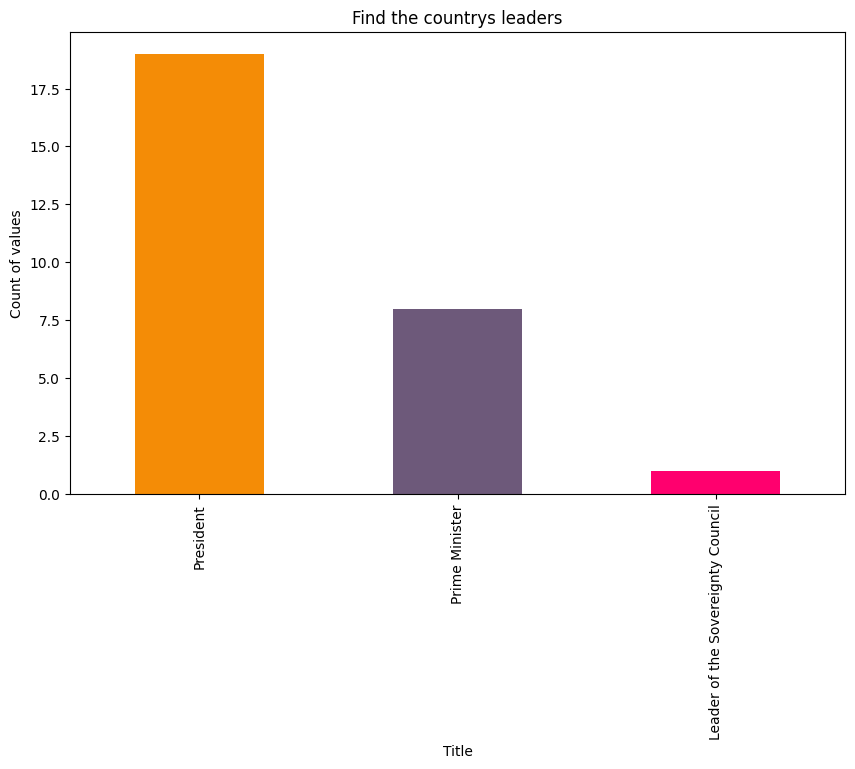

In [160]:
# Visualize the bar plot to understand the majority of the country lead by president and prime minister
all_countrys['title'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,6),color=['#f48c06','#6d597a','#ff006e'],title="Find the countrys leaders")
plt.xlabel("Title")
plt.ylabel("Count of values")
plt.show()

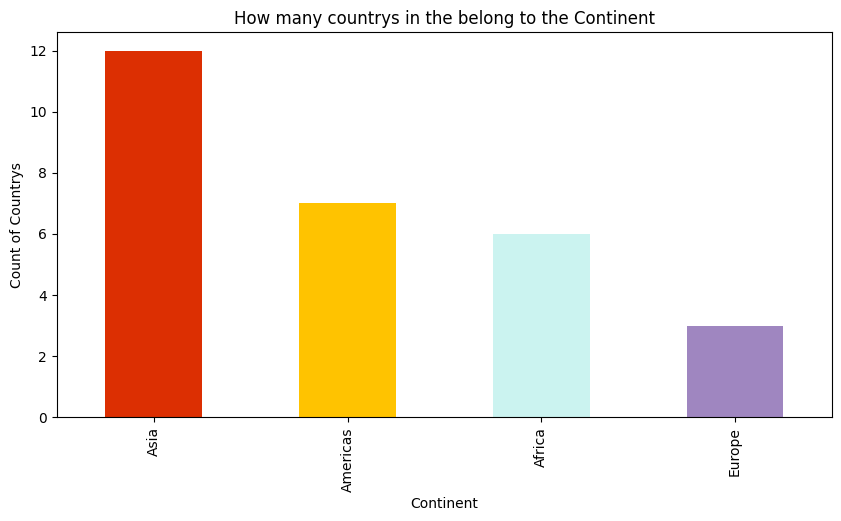

In [161]:
#Visualize the how many countrys belong to the continent
all_countrys.groupby(['continent'])['country'].count().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,5),color=['#dc2f02','#ffc300','#cbf3f0','#9f86c0'])
plt.title("How many countrys in the belong to the Continent")
plt.xlabel("Continent")
plt.ylabel("Count of Countrys")
plt.show()

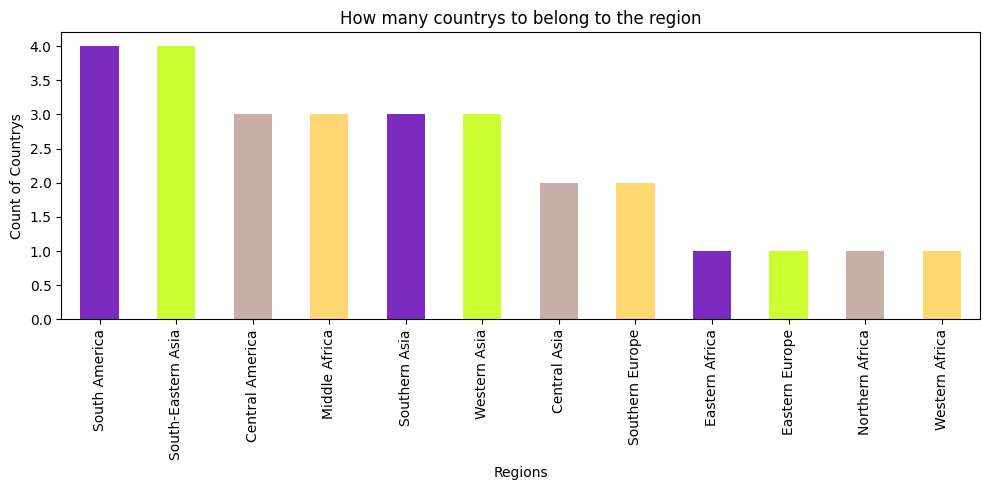

In [162]:
regions_data=all_countrys.groupby(['region'])['country'].count().sort_values(ascending=False)
regions_data.plot(kind='bar',figsize=(10,5),color=['#7b2cbf','#ccff33','#c9ada7','#ffd670'])
plt.title("How many countrys to belong to the region")
plt.xlabel("Regions")
plt.ylabel("Count of Countrys")
plt.tight_layout()
plt.show()

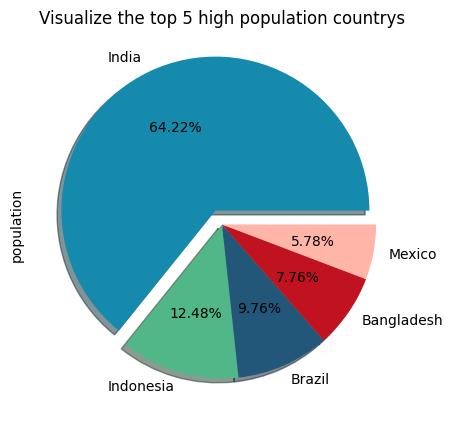

In [163]:
plt.figure(figsize=(10,5))
all_countrys.groupby(['country'])['population'].sum().sort_values(ascending=False).head(5)\
.plot(kind='pie',explode=[0.1,0,0,0,0],
    labels=['India','Indonesia','Brazil','Bangladesh','Mexico'],
    colors=['#168aad','#52b788','#22577a','#c1121f','#ffb5a7'],
    autopct='%1.2f%%',
    shadow=True)
plt.title("Visualize the top 5 high population countrys")
plt.show()

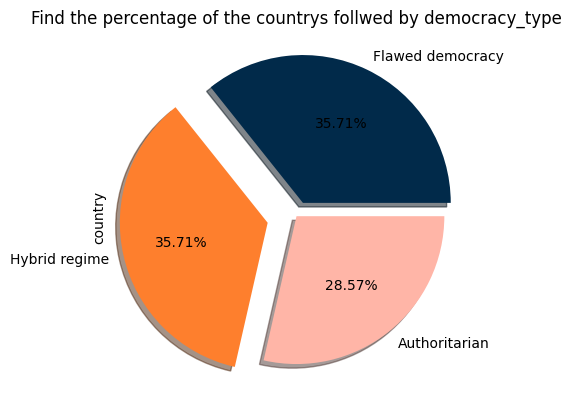

In [164]:
democracy=all_countrys.groupby(['democracy_type'])['country'].count().sort_values(ascending=False)
democracy.plot(kind='pie',explode=[0.1,0.2,0],
    labels=['Flawed democracy','Hybrid regime','Authoritarian'],
    colors=['#012a4a','#fe7f2d','#ffb5a7'],
    autopct='%1.2f%%',
    shadow=True)
plt.title("Find the percentage of the countrys follwed by democracy_type")
plt.show()

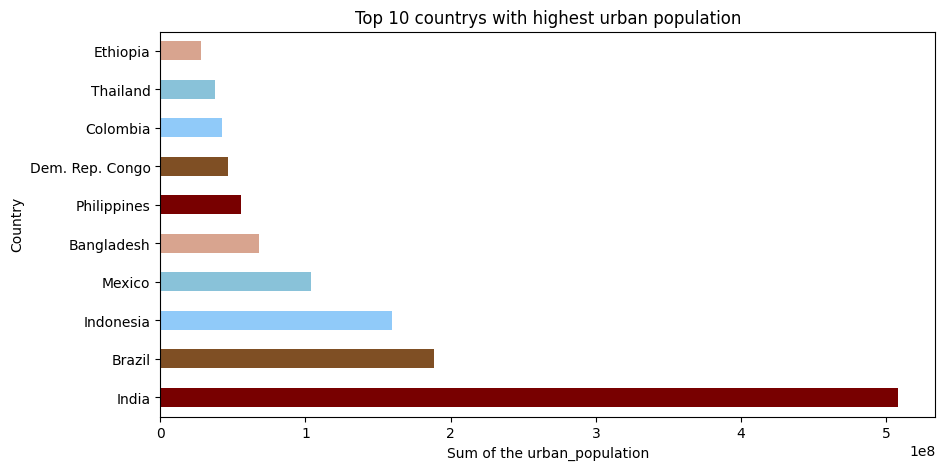

In [165]:
all_countrys.groupby(['country'])['urban_population'].sum().sort_values(ascending=False).head(10)\
.plot(kind='barh',figsize=(10,5),color=['#780000','#7f4f24','#90caf9','#89c2d9','#d8a48f'])
plt.title("Top 10 countrys with highest urban population")
plt.xlabel("Sum of the urban_population")
plt.ylabel("Country")
plt.show()

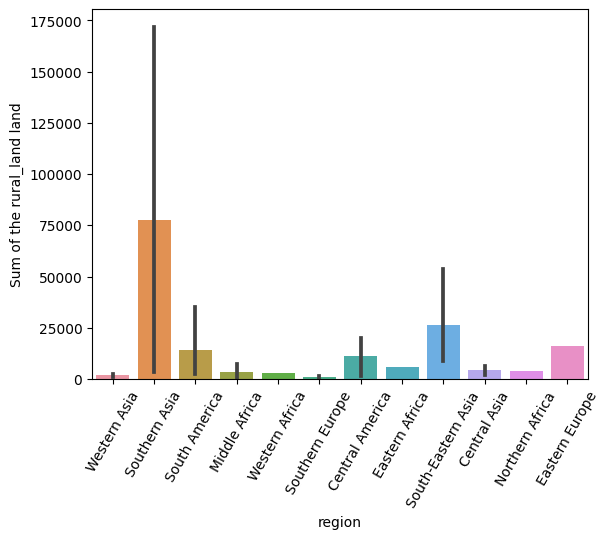

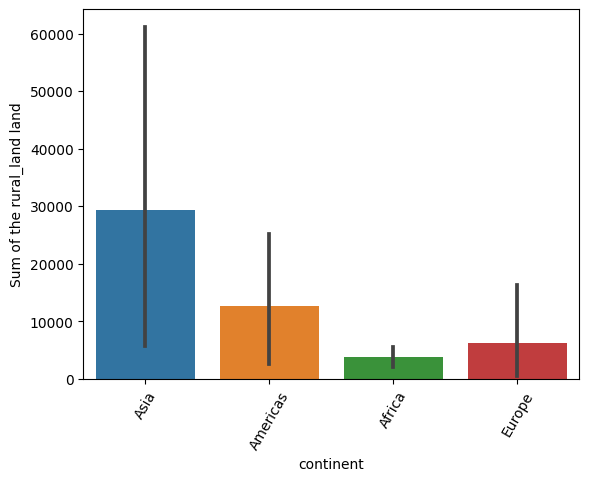

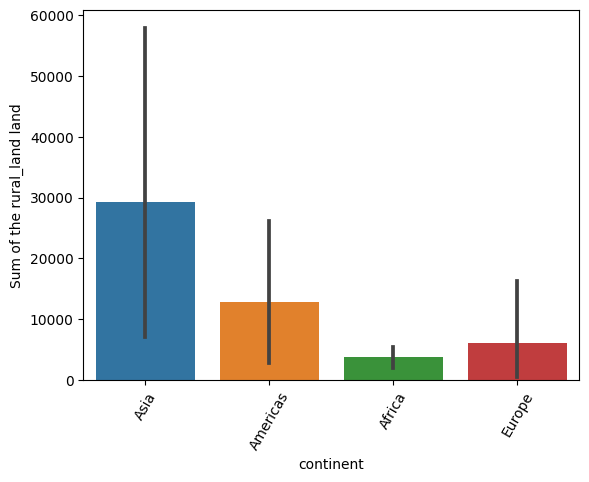

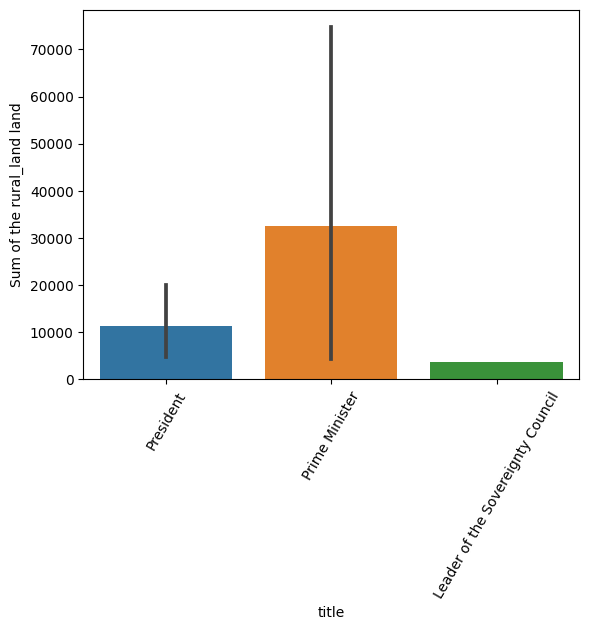

In [166]:
for i in all_countrys[['region','continent','continent','title']]:
    sns.barplot(data=all_countrys,x=i,y='urban_land')
    plt.xlabel(i)
    plt.ylabel("Sum of the rural_land land")
    plt.xticks(rotation=60)
    plt.show()

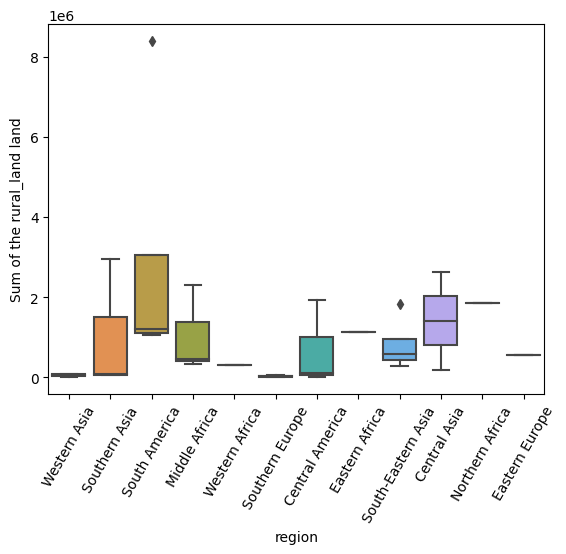

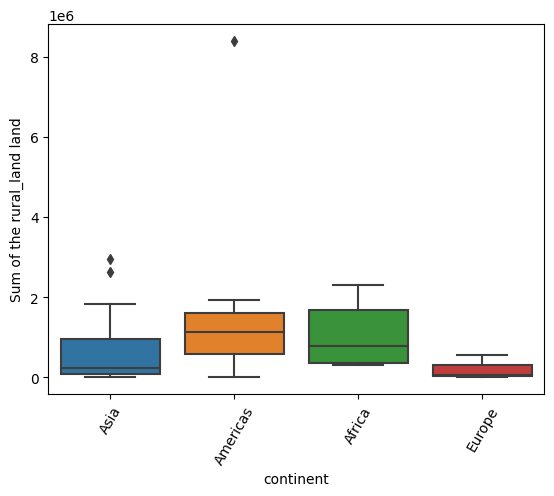

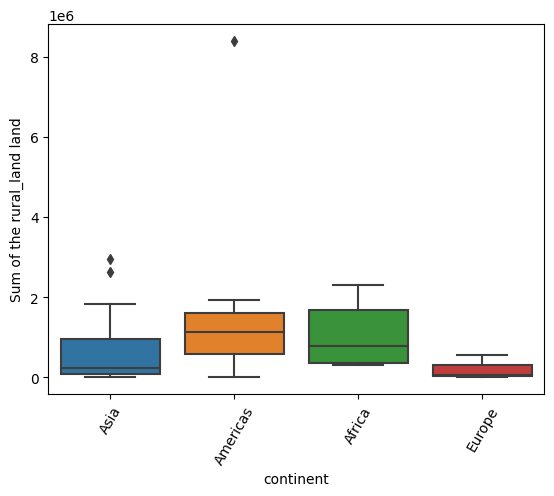

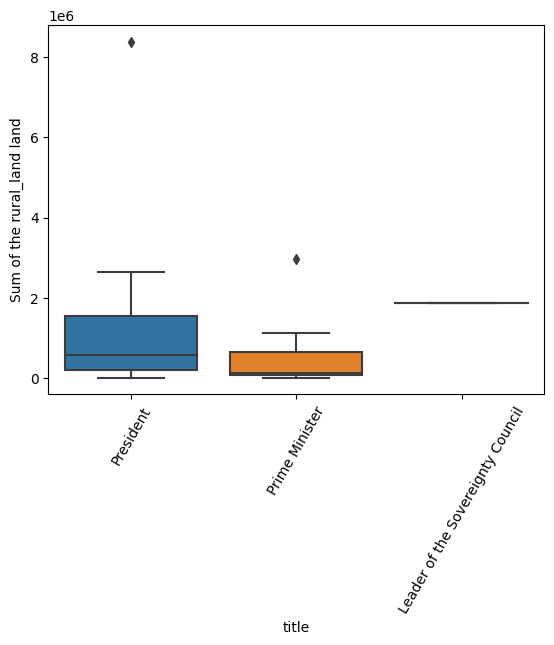

In [167]:
for i in all_countrys[['region','continent','continent','title']]:
    sns.boxplot(data=all_countrys,x=i,y='rural_land')
    plt.xlabel(i)
    plt.ylabel("Sum of the rural_land land")
    plt.xticks(rotation=60)
    plt.show()


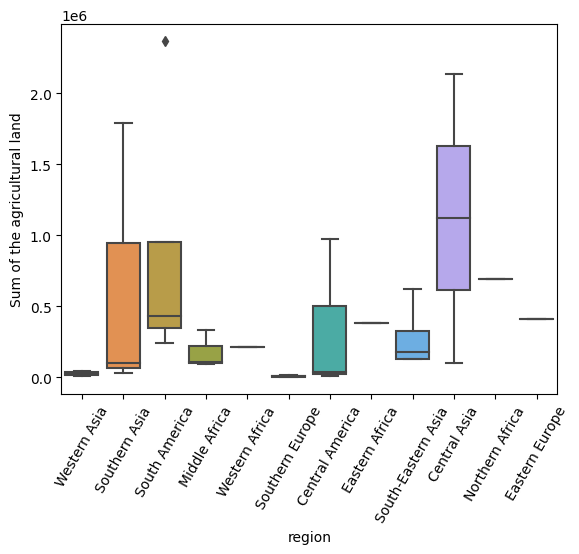

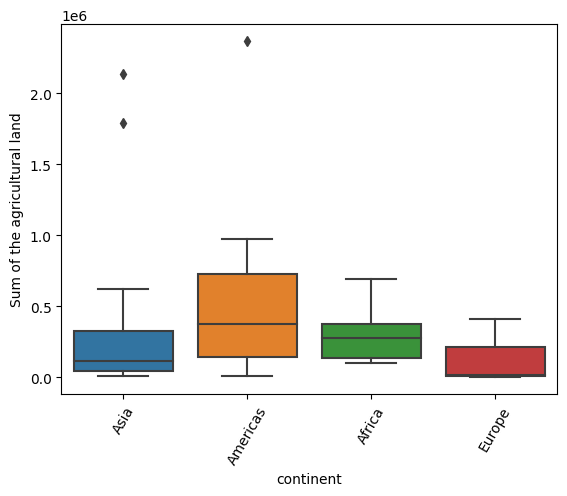

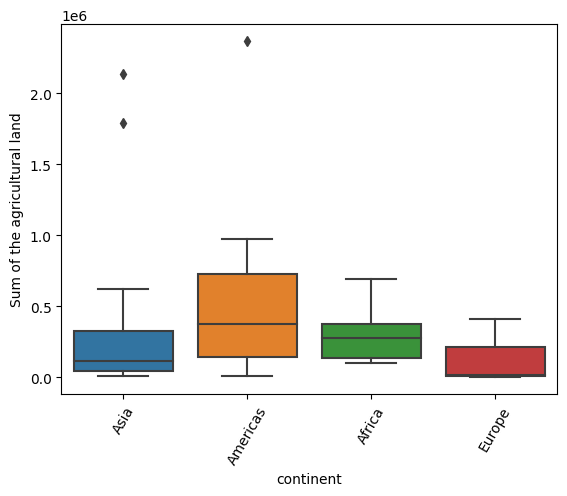

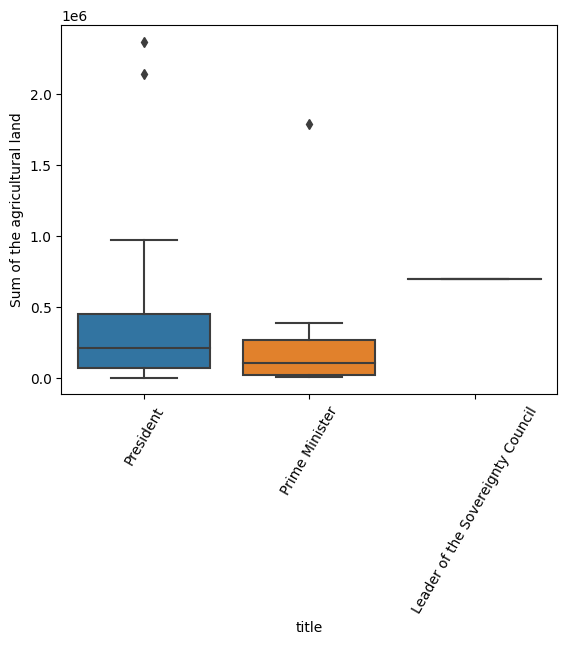

In [168]:
for i in all_countrys[['region','continent','continent','title']]:
    sns.boxplot(data=all_countrys,x=i,y='agricultural_land')
    plt.xlabel(i)
    plt.ylabel("Sum of the agricultural land")
    plt.xticks(rotation=60)
    plt.show()


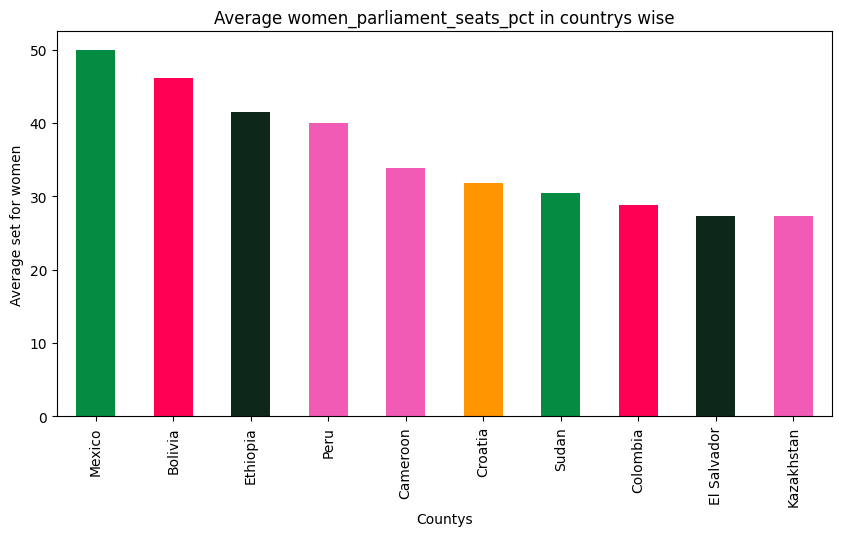

In [169]:
# women_parliament_seats_pct average  countrys with women_parliament_seats_pct 
all_countrys.groupby(['country'])['women_parliament_seats_pct'].mean().sort_values(ascending=False).head(10)\
.plot(kind='bar',figsize=(10,5),color=['#058c42','#ff0054','#0d2818','#f15bb5','#f15bb5','#ff9500'])
plt.title("Average women_parliament_seats_pct in countrys wise")
plt.xlabel("Countys")
plt.ylabel("Average set for women")
plt.show()